| Clave de la clase   |     ICC006      |
|:----------|:-------------|
| **Título del proyecto** |  Consistent y Rendezvous Hashing |
| **Miembros de equipo** | 35994 - Sebastian Garcia<br>32366 - Luis Bernardo Bremer Ortega<br>32954 - John Brandon Nemeth Rodriguez<br>35592 - Rodrigo Rosas Fernandez|
| **Fecha** | 05/2023|

### Estructura del proyecto:

1. <b><span style="color:#B22222">Introducción.</span></b>
2. <b><span style="color:#B22222">Pseudocódigo y análisis asintótico.</span></b>
3. <b><span style="color:#B22222">Caso de estudio.</span></b>
4. <b><span style="color:#B22222">Características del conjunto de datos.</span></b>
5. <b><span style="color:#B22222">Implementación.</span></b>
6. <b><span style="color:#B22222">Métricos.</span></b>
7. <b><span style="color:#B22222">Resultados y , limitaciones del algoritmo y otras heurísticas. </span></b>
8. <b><span style="color:#B22222">Referencias.</span></b>

## 1. Introducción.

Este reporte se enfocará en el estudio detallado del algoritmo de Consistent Hashing. Este algoritmo, introducido por primera vez por Karger et al. en 1997, se ha convertido en una solución clave para el equilibrio de carga, la tolerancia a fallos y la escalabilidad en sistemas distribuidos. Su aplicación incluye sistemas de almacenamiento en caché, bases de datos distribuidas y balanceo de carga en servidores web.
En este reporte, se discutirán los fundamentos y las evoluciones del algoritmo de Consistent Hashing, incluyendo su pseudocódigo, análisis asintótico, casos de estudio, características del conjunto de datos, implementación, métricas, resultados y limitaciones. Se mostrarán las iteraciones de cada implementación, incluyendo Linear Probing.
Además, se examinarán otras heurísticas y enfoques relacionados que se han desarrollado para abordar los desafíos y demandas de la distribución de datos y la escalabilidad en sistemas modernos. Con este análisis exhaustivo, se espera brindar una visión actualizada y completa del impacto del algoritmo de Consistent Hashing en el campo de la informática distribuida.

## 2. Pseudo-código.

### 2.1. Funciones.
<br>
Para el algoritmo de Consistent Hashing, las funciones principales que comprende son las siguientes, listadas de mayor a menor importancia:

**Agregar nodo**: Esta función se utiliza para agregar un nuevo nodo al anillo de hashing. Implica la asignación de un rango de claves al nuevo nodo y reasignar algunas claves existentes si es necesario.

**Remover nodo:** Esta función se utiliza para eliminar un nodo del anillo de hashing. Implica redistribuir las claves que estaban asignadas a ese nodo eliminado a los nodos restantes.

**Asignar clave:** Esta función se utiliza para asignar una clave a un nodo en el anillo de hashing. Dado una clave, se determina el nodo responsable de almacenar dicha clave en función de su posición en el anillo.

**Buscar nodo:** Esta función se utiliza para encontrar el nodo responsable de almacenar una clave en particular. Dado una clave, se puede encontrar el nodo correspondiente utilizando el anillo de hashing y su función de hash.

**Balanceo de carga:** Esta función se utiliza para equilibrar la carga entre los nodos en el anillo de hashing. Si hay una distribución desigual de claves entre los nodos, se pueden realizar ajustes para redistribuir las claves y lograr un equilibrio de carga.

**Recuperación de nodos:** Esta función se utiliza para manejar la recuperación de nodos cuando un nodo se une nuevamente al anillo de hashing después de estar inactivo o fuera de servicio. Implica transferir las claves que pertenecían a ese nodo a su posición original.
<br>

### 2.2. Elementos de la estructura de datos. <br>
**Los principales componentes de la estructura de datos en el algoritmo de Consistent Hashing son los siguientes:**

**Anillo de hashing:** Es la estructura principal utilizada en el algoritmo de Consistent Hashing. Consiste en un anillo imaginario o circular en el que se distribuyen los nodos y las claves. Los nodos se colocan en diferentes posiciones del anillo utilizando una función de hash, y las claves se asignan a los nodos en función de su posición en el anillo.

**Función de hash:** Es una función utilizada para asignar valores, como nodos y claves, a posiciones en el anillo de hashing. Esta función de hash debe ser determinista y generar distribuciones uniformes de valores en el anillo para lograr un equilibrio de carga adecuado.

**Nodo:** Representa un servidor o una entidad que almacena y gestiona un conjunto de claves. Cada nodo se asigna a una posición en el anillo de hashing utilizando la función de hash. Los nodos se pueden agregar, eliminar o recuperar en el anillo según sea necesario.

**Clave:** Es un valor o identificador único que se almacena y recupera en el algoritmo de Consistent Hashing. Cada clave se asigna a un nodo en el anillo de hashing utilizando la función de hash y la posición relativa de los nodos en el anillo.

**Virtualización de nodos:** En el algoritmo de Consistent Hashing, es común utilizar nodos virtuales o réplicas virtuales de los nodos reales. Estos nodos virtuales se colocan en diferentes posiciones del anillo de hashing y ayudan a distribuir las claves de manera más uniforme y mejorar el equilibrio de carga.<br>

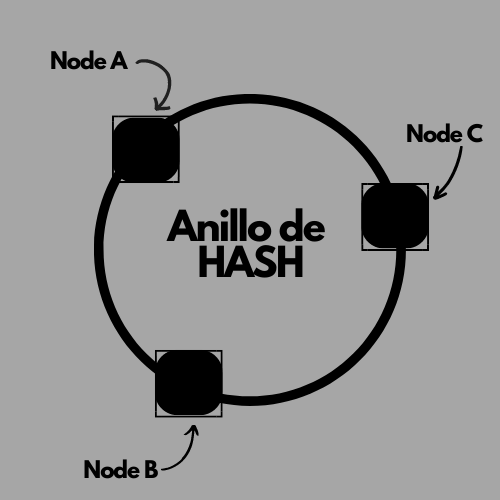

### 2.3. Propiedades. <br>
Consistent Hashing tiene varias propiedades importantes que se mantienen en su funcionamiento. 
A continuación, se enumeran y ejemplifican las principales propiedades junto con la operación que las mantiene:

**Distribución uniforme de las claves:** Consistent Hashing busca distribuir las claves de manera uniforme en el anillo de hashing. Esto se logra utilizando una función de hash que distribuye las claves de manera equitativa en el anillo. Cada nodo es responsable de un rango de claves, y las claves se asignan a los nodos según su posición en el anillo.

**Ejemplo de violación:** Si no se utiliza una función de hash adecuada, las claves pueden concentrarse en ciertos nodos, lo que resultaría en una distribución desigual.

**Restauración de la propiedad:** Al utilizar una buena función de hash y, en algunos casos, la virtualización de nodos, se puede lograr una distribución más uniforme de las claves en el anillo.

**Equilibrio de carga:** Consistent Hashing busca equilibrar la carga entre los nodos en el anillo de hashing. Cada nodo es responsable de un rango de claves, y si la distribución de claves entre los nodos es desigual, se pueden realizar ajustes para redistribuir las claves y lograr un equilibrio de carga.

**Ejemplo de violación:** Si se agregan o eliminan nodos sin redistribuir las claves adecuadamente, algunos nodos pueden estar sobrecargados mientras que otros están subutilizados.

**Restauración de la propiedad:** Al agregar o eliminar nodos, se realiza una redistribución de claves para equilibrar la carga entre los nodos existentes.

**Estabilidad del mapeo clave-nodo:** Consistent Hashing busca mantener un mapeo estable entre las claves y los nodos en el anillo de hashing. A menos que se agreguen o eliminen nodos, una clave determinada se asignará siempre al mismo nodo en el anillo.

**Ejemplo de violación:** Si se agregan o eliminan nodos sin considerar adecuadamente el mapeo clave-nodo existente, algunas claves pueden ser reasignadas incorrectamente.

**Restauración de la propiedad:** Al agregar o eliminar nodos, se realiza una redistribución de claves de manera que el mapeo clave-nodo se mantenga estable tanto como sea posible.

Al mantener estas propiedades, se garantiza una distribución uniforme de las claves, un equilibrio de carga adecuado y un mapeo estable entre las claves y los nodos en el anillo de hashing.

<br>

### 2.4. <Nombre de la función><br>

A continuación, se describe una de las funciones principales en Consistent Hashing:

Función: Asignar clave
 
- Alg. Asignar-clave(clave):
    1. Calcular el valor hash de la clave: hash_value = hash(clave)
    2. Encontrar el nodo sucesor más cercano en sentido horario en el anillo de hashing:
       nodo_asignado = encontrar_sucesor(hash_value)
    3. Devolver el nodo_asignado como el nodo responsable de almacenar la clave
<br><br>
- Análisis asintótico: En el peor de los casos, el tiempo de ejecución de la función de asignar clave depende de la función de búsqueda del nodo sucesor más cercano en el anillo. Si se utiliza una estructura de datos eficiente, como un árbol binario de búsqueda, el tiempo de búsqueda del nodo sucesor más cercano sería de O(log n), donde n es el número de nodos en el anillo de hashing. Por lo tanto, el análisis asintótico de la función de asignar clave sería O(log n).

Esta función es fundamental en Consistent Hashing, ya que determina qué nodo será responsable de almacenar una clave en particular. Al utilizar la posición de la clave en el anillo y encontrar su nodo sucesor más cercano, se garantiza que la clave se almacene de manera consistente y se pueda recuperar correctamente en futuras operaciones.
Objetivo: Esta función se utiliza para asignar una clave a un nodo en el anillo de hashing. Dada una clave, el objetivo es determinar el nodo responsable de almacenar esa clave en función de su posición en el anillo.

Pseudocódigo:

### 3. Caso de estudio

Para analizar el desempeño de su algoritmo deberá procesar un conjunto de datos. Por ejemplo, para un algoritmo de almacenamiento de datos el caso de estudio puede ser almacenar las preguntas que hace un usuario en una búsqueda de internet. Puede hacer uso de un conjunto de datos existente en:
- [Dataset search de Google](https://datasetsearch.research.google.com/).
- [Open dataset de Kaggle](https://www.kaggle.com/datasets).
- [Nasa](https://pds.nasa.gov/datasearch/data-search/).
- [INEGI](https://www.inegi.org.mx/siscon/).

### 4. Características del conjunto de datos.

Debe analizar su conjunto de datos estimando [estadísticos de dispersión](https://en.wikipedia.org/wiki/Statistical_dispersion) propiamente: media, varianza, desviación estandar y quartiles. Existen paquetes en Excell, pandas u otras herramientas que le permiten estimar tales parámetros de manera sencilla. Incluya una tabla o una imagen con su análisis y explique que propiedades tiene su conjunto de datos.

### 5. Implementación.

package mx.cicese.dcc.teikoku.scheduler.grid.strategy.rigid;

import java.util.List;
import java.util.UUID;

import de.irf.it.rmg.core.teikoku.job.Job;
import de.irf.it.rmg.core.teikoku.workload.job.SWFJob;
import mx.cicese.dcc.teikoku.scheduler.plan.AllocationEntry;
import mx.cicese.dcc.teikoku.scheduler.plan.JobControlBlock;

public class LP extends RigidStgy{
	
	/**
	 * Class constructor
	 * 
	*/
		public LP(){
			super();
		}

		
		/**
		 * (non-Javadoc)
		 * 
		 * @see mx.cicese.dcc.teikoku.scheduler.grid.strategy.rigid.RigidStgy#schedule(Job job)
		 */
		public AllocationEntry schedule(Job job, JobControlBlock jcb) {
			@Override
			public AllocationEntry schedule(Job job, JobControlBlock jcb) {
				// GET THE LIST OF MACHINES IN THE SYSTEM
				if (jobFilteringStgy.getKnownMachines().size() == 0) {
					jobFilteringStgy.setKnownMachines(gridInfBroker.getKnownMachines(), gridInfBroker);
				}

				List<UUID> machineSet = jobFilteringStgy.getKnowMachines();

				// Get the job parameters
				String id = job.getName() + job.getReleaseTime().toString() + job.getPriority();

				// CREATE AN ALLOCATION ENTRY
				AllocationEntry entry = null;

				const crypto = require('crypto');

				// Función para generar una llave (índice en el hash ring) a partir de un diccionario de atributos
								function generar_llave(atributos) {
								// Concatena los valores de los atributos en una cadena
				  const atributos_concatenados = Object.values(atributos).join('');
								// Calcula el hash SHA-256 de la cadena concatenada y convierte el resultado en un entero en base 16
				  const hash_value = parseInt(crypto.createHash('sha256').update(atributos_concatenados).digest('hex'), 16) % 100;
								// Devuelve el valor de hash
								return hash_value;
				}

				// Función para generar una llave para un trabajo utilizando la función generar_llave
								function generar_llave_trabajo(trabajo) {
								return generar_llave(trabajo);
				}

				// Función para generar una llave para una máquina utilizando la función generar_llave
								function generar_llave_maquina(maquina) {
								return generar_llave(maquina);
				}

				// Función para simular un hash ring y asignar trabajos y máquinas a posiciones en el hash ring
								function simular_hash_ring(trabajos, maquinas) {
									// Inicializa el hash ring como una lista de 100 elementos null
				  const hash_ring = Array(100).fill(null);

									// Asigna trabajos al hash ring utilizando la función generar_llave_trabajo
									for (const trabajo of trabajos) {
										// Calcula el índice en el hash ring para el trabajo (convierte el valor hexadecimal a entero en base 16)
					const index = generar_llave_trabajo(trabajo);
										// Asigna el trabajo a la posición correspondiente en el hash ring
										hash_ring[index] = ['trabajo', trabajo];
									}

									// Asigna máquinas al hash ring utilizando la función generar_llave_maquina
									for (const maquina of maquinas) {
										// Calcula el índice en el hash ring para la máquina (convierte el valor hexadecimal a entero en base 16)
					const index = generar_llave_maquina(maquina);
										// Asigna la máquina a la posición correspondiente en el hash ring
										hash_ring[index] = ['maquina', maquina];
									}

									// Devuelve el hash ring con trabajos y máquinas asignados
									return hash_ring;
								}

				// Función para encontrar el nodo responsable para un trabajo en el hash ring
								function encontrar_nodo_responsable(index_trabajo, hash_ring) {
									// Busca el primer nodo (maquina) en el hash_ring que sigue al trabajo
									for (let i = index_trabajo; i < hash_ring.length; i++) {
										if (hash_ring[i] !== null && hash_ring[i][0] === 'maquina') {
											return hash_ring[i][1];
										}
									}

									// Si no se encuentra una maquina en el resto del hash_ring, se busca desde el inicio
									for (let i = 0; i < index_trabajo; i++) {
										if (hash_ring[i] !== null && hash_ring[i][0] === 'maquina') {
											return hash_ring[i][1];
										}
									}

									// Si no se encuentra ninguna maquina en el hash_ring, retorna null
									return null;
								}

				// Ejemplo de uso de las funciones
				const trabajos = [
								{ id: 1, carga: 50, descripcion: 'Procesar datos' },
								{ id: 2, carga: 20, descripcion: 'Analizar datos' },
								{ id: 3, carga: 15, descripcion: 'Generar reportes' },
								{ id: 4, carga: 30, descripcion: 'Renderizar video' },
								{ id: 5, carga: 25, descripcion: 'Entrenar modelo de IA' },
								{ id: 6, carga: 40, descripcion: 'Procesar datos' },
								{ id: 7, carga: 35, descripcion: 'Analizar datos' },
								{ id: 8, carga: 55, descripcion: 'Generar reportes' },
								{ id: 9, carga: 45, descripcion: 'Renderizar video' },
								{ id: 10, carga: 60, descripcion: 'Entrenar modelo de IA' }
				];

				const maquinas = [
								{ id: 'M1', capacidad: 100, descripcion: 'Servidor de datos' },
								{ id: 'M2', capacidad: 80, descripcion: 'Servidor de análisis' },
								{ id: 'M3', capacidad: 60, descripcion: 'Servidor de reportes' },
								{ id: 'M4', capacidad: 120, descripcion: 'Servidor de video' },
								{ id: 'M5', capacidad: 140, descripcion: 'Servidor de IA' },
								{ id: 'M6', capacidad: 150, descripcion: 'Servidor de datos' },
								{ id: 'M7', capacidad: 160, descripcion: 'Servidor de análisis' },
								{ id: 'M8', capacidad: 170, descripcion: 'Servidor de reportes' },
								{ id: 'M9', capacidad: 180, descripcion: 'Servidor de video' },
								{ id: 'M10', capacidad: 190, descripcion: 'Servidor de IA' }
				];

				// Crea un hash ring con trabajos y máquinas utilizando la función simular_hash_ring
				const hash_ring = simular_hash_ring(trabajos, maquinas);

				// Recorre el hash ring e imprime el tipo, atributos e índice de cada elemento
								for (let index = 0; index < hash_ring.length; index++) {
				  const elemento = hash_ring[index];
									if (elemento !== null) {
					const tipo = elemento[0];
					const atributos = elemento[1];
										console.log(`Index: ${index}, Tipo: ${tipo}, Atributos: ${JSON.stringify(atributos)}`);

										// Si el elemento es un trabajo, encuentra e imprime el nodo responsable
										if (tipo === 'trabajo') {
					  const nodo_responsable = encontrar_nodo_responsable(index, hash_ring);
											if (nodo_responsable !== null) {
												console.log(`nodo responsable para el trabajo: ${JSON.stringify(nodo_responsable)}`);
											} else {
												console.log('No se encontró un nodo responsable para el trabajo');
											}
										}
									}
								}
				return entry;
			}

		} 
}

```
project
│     CMakeLists.txt
│   
└───build   # ubicación donde generará su código fuente
│   │   
│   │   
│   │   ...
│   
└───include # ubicación donde colocará el/los archivos de la biblioteca a implementar
│   │  algoritmo.hpp  
│   │  algoritmo_de_entrada.hpp
│   │   ...
│   
└───src    # ubicación donde colocará un archivo de pruebas personales 
│   │   
│   │   
│   │   ...
│
└───dataset # ubicación donde colocará su conjunto de datos 
│   │   datos_<etiqueta>_prueba.<extension>
│   │   datos_<etiqueta>_validacion.<extension>
│   │   ...
│   
└─── test
    │   prueba_insercion.cpp
    │   prueba_consulta.cpp
    │   prueba_borrado.cpp
    │   prueba_intensiva.cpp
    │   ...
    
```